In [73]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [254]:
img = cv2.imread("images/00.png")

In [59]:
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

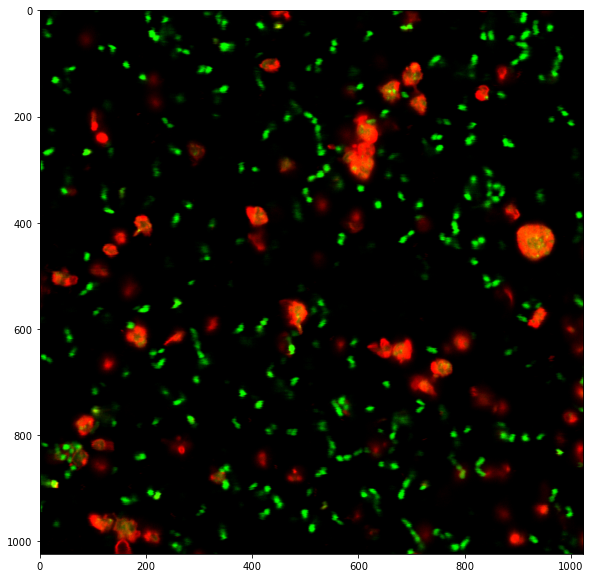

In [60]:
plt.figure(figsize=(10, 10))
plt.imshow(rgb_img)
# plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis

In [61]:
# Time to show only the red stuff

In [62]:
# R-G-B
rgb_img[:,:,1] = 0 # green
rgb_img[:,:,2] = 0 # blue

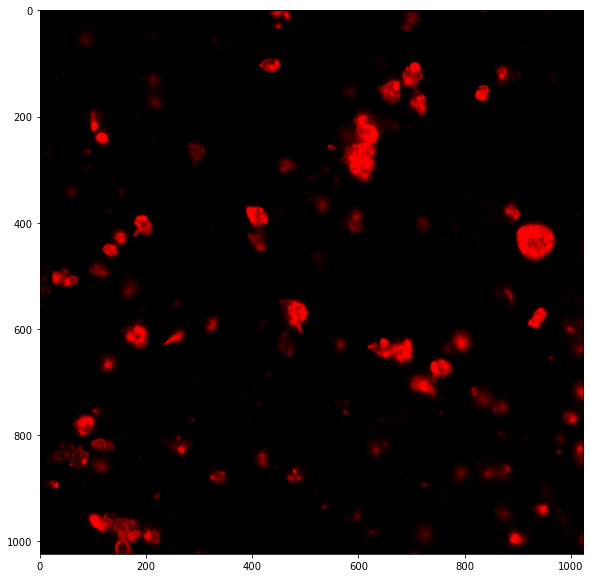

In [63]:
plt.figure(figsize=(10, 10))
plt.imshow(rgb_img)

In [256]:
# Convert to grey scale and apply watershed
img_bgr = img
img_bgr[:,:,1] = 0 # green
gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)

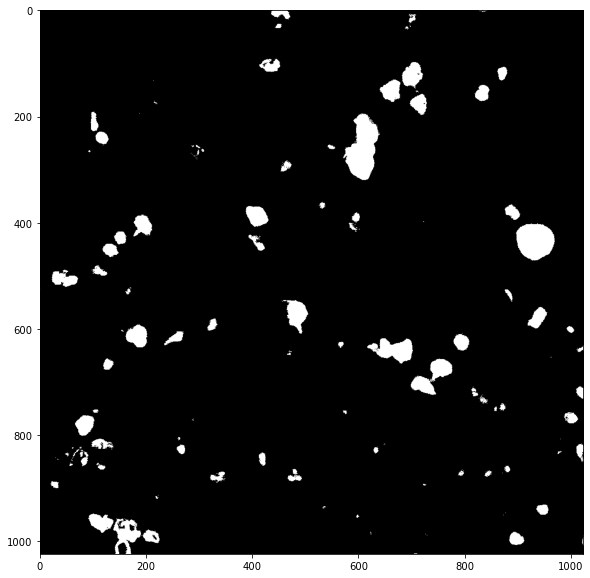

In [257]:
# https://docs.opencv.org/master/d3/db4/tutorial_py_watershed.html

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(10, 10))
plt.imshow(thresh, cmap='gray')

In [258]:
# noise removal
kernel = np.ones((2,2),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 5)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=10)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

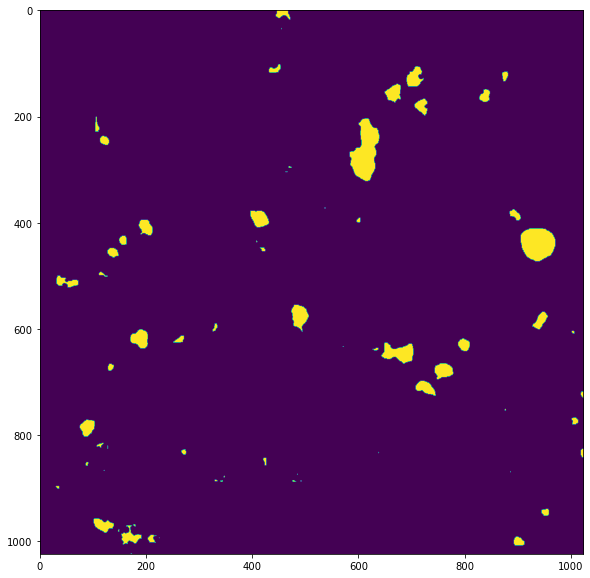

In [259]:
plt.figure(figsize=(10, 10))
plt.imshow(sure_fg,)

In [260]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

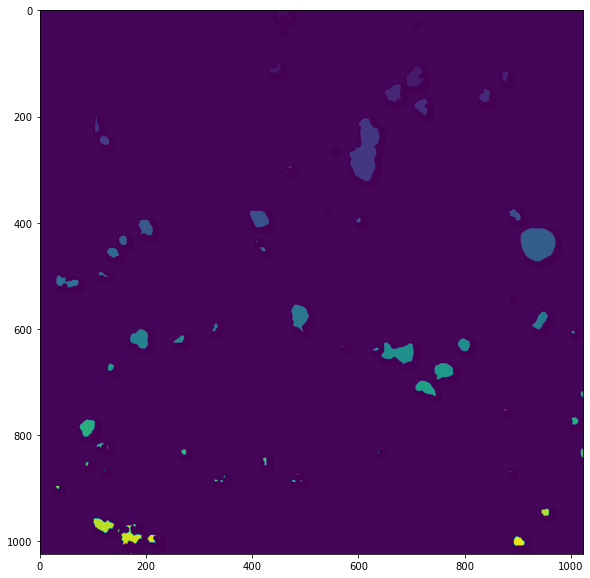

In [261]:
plt.figure(figsize=(10,10))
plt.imshow(markers)

In [262]:
markers = cv2.watershed(img,markers)
img_bgr[markers == -1] = [255,0,0]

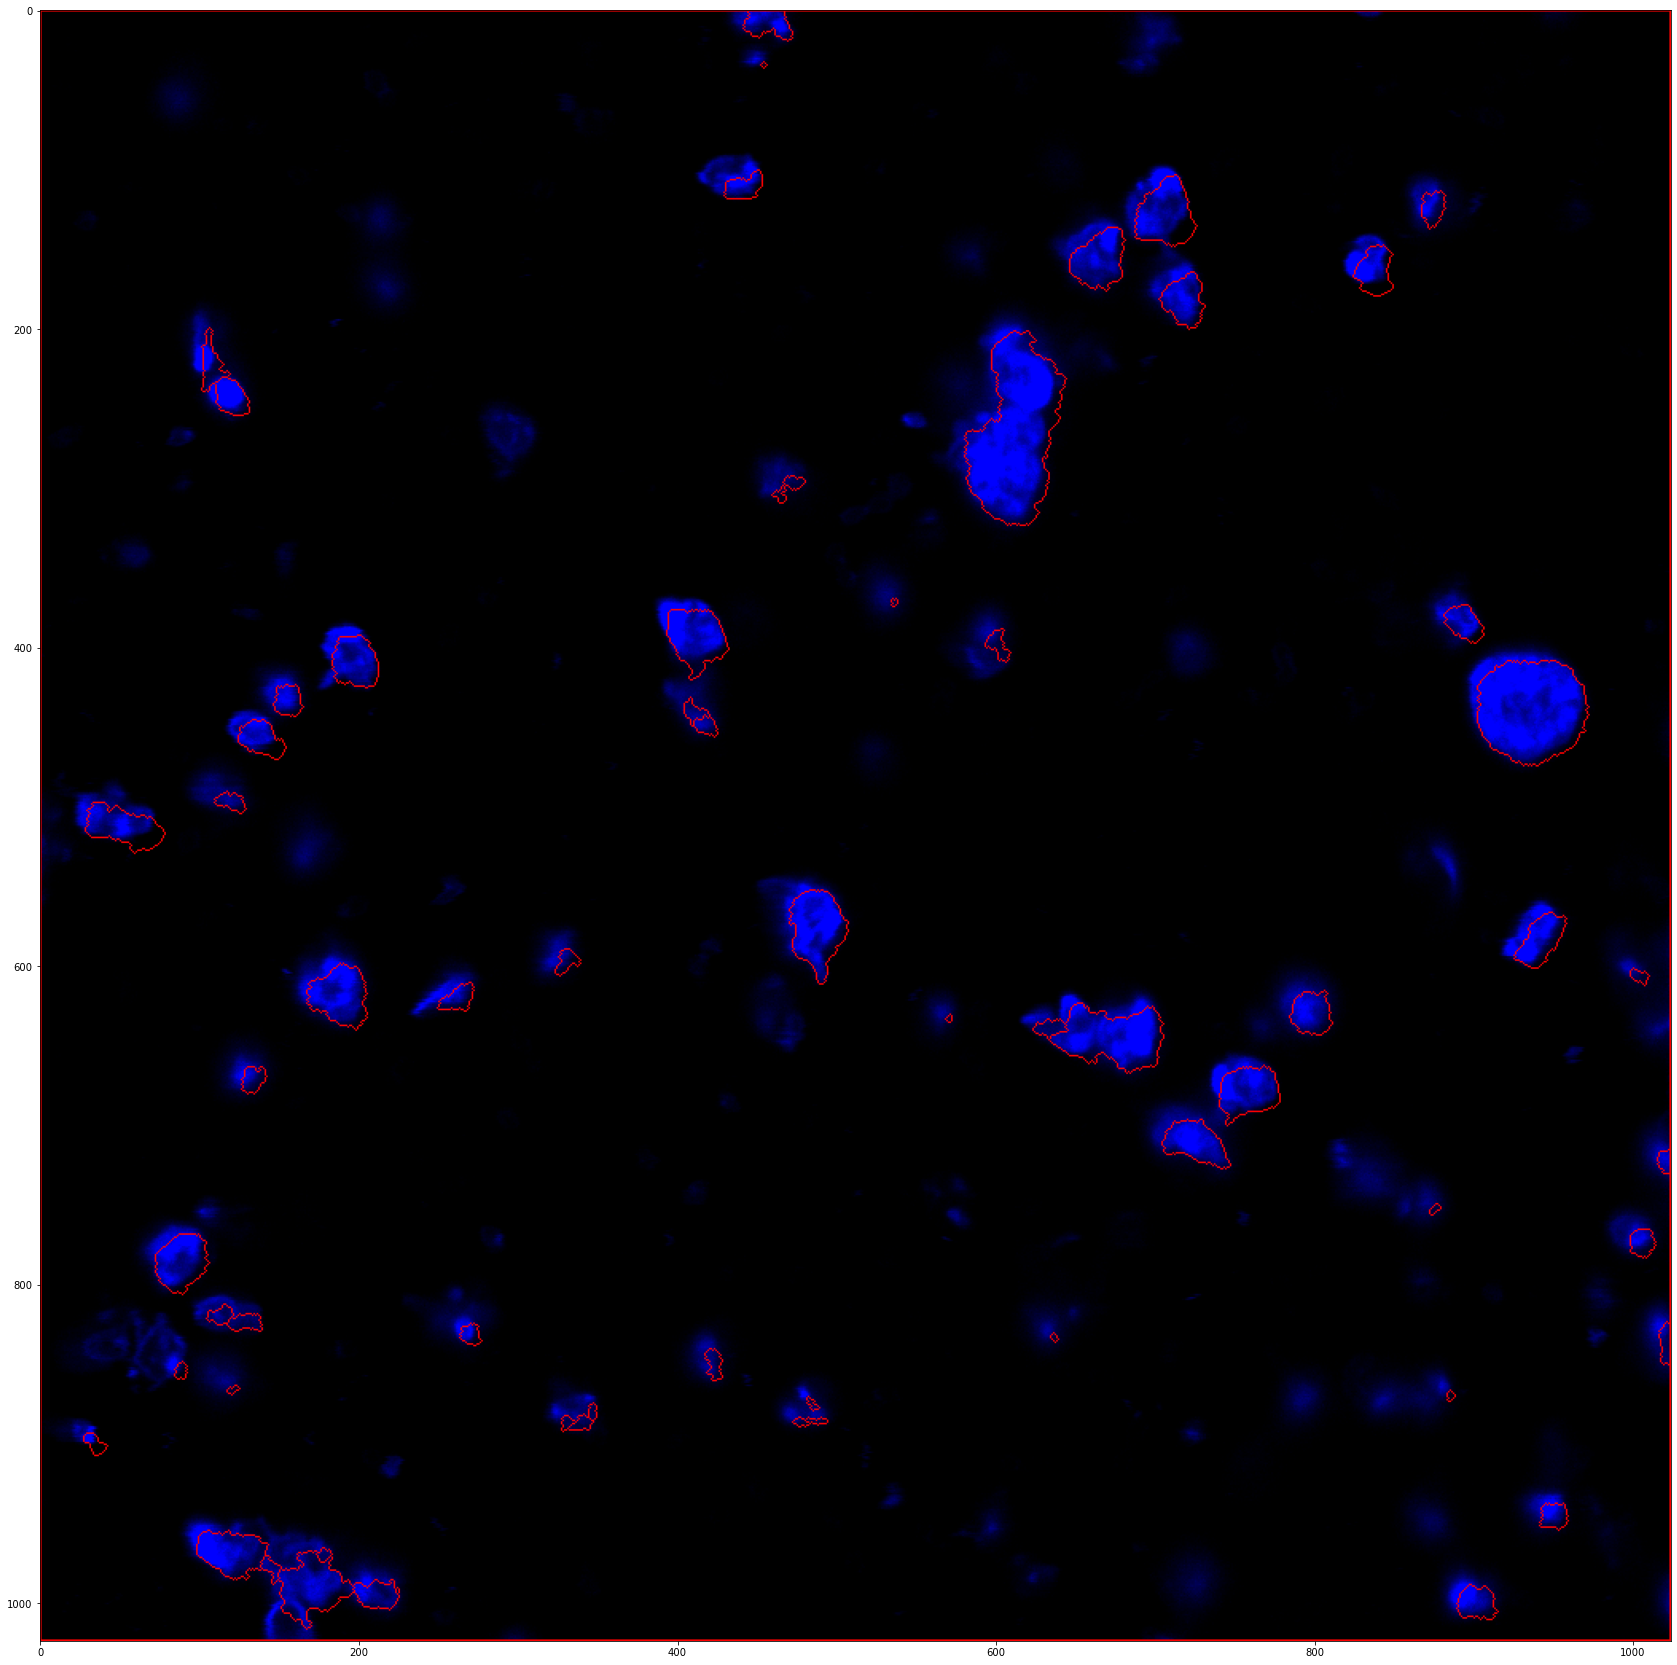

In [264]:
plt.figure(figsize=(30,30))
plt.imshow(img_bgr)